# Tree plotting with `toytree`

In [41]:
import toytree
import toyplot
import numpy as np

In [42]:
newick = \
"""((33588_przewalskii:100,32082_przewalskii:100)100:100,(33413_thamno:100,
((35236_rex:100,30556_thamno:100)82:82,((35855_rex:100,40578_rex:100)100:100,
(38362_rex:100,39618_rex:100)100:100)73:73)91:91)100:100,
((30686_cyathophylla:100,29154_superba:100)100:100,
(41954_cyathophylloides:100,41478_cyathophylloides:100)100:100)100:100);"""

## The basic toytree Class object
The help documentation for toytree objects can be accessed with `?` or `<tab>-completion`, which I've printed below. 

In [43]:
tre = toytree.tree(newick)
tre

## (re-) rooting a trre
toytree uses an [`ete3.Tree Class object`](http://etetoolkit.org/docs/latest/tutorial/index.html) as its base tree representation object, which can be accessed in the `.tree` attribute. The ete3.Tree object parses the newick file, and toytree accesses information from the parsed tree file. Thus, to modify the tree and its attributes you must modify the .tree (ete3.Tree) object directly. Most of the time this will not be necessary, but for advanced usage it makes sense to describe how the data are stored. 

For the simple purpose of plotting users will rarely need to access the .tree object directly. Thus toytree offers some simpler convenience functions for modifying the tree such as the `.root()` function to re-root the tree, based on entry of either a list of outgroup names, or a wildcard selector of outgroup sample names. 

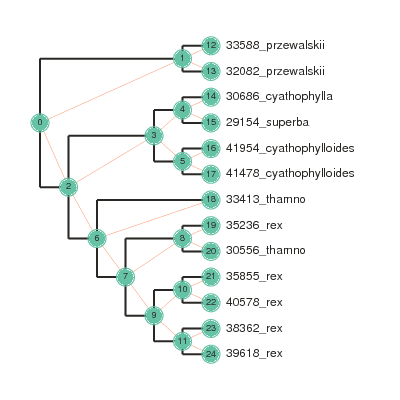

In [49]:
## root the tree (either by entering outgroup names or using a wildcard
tre.root(["32082_przewalskii", "33588_przewalskii"])
tre.root(wildcard="prz")

## draw the tree
canvas, axes = tre.draw(width=400, node_labels=True);
#toyplot.html.render(canvas, "/home/deren/Documents/toytree/docs/README_figure.html")
import toyplot.svg
toyplot.png.render(canvas, '/home/deren/Documents/toytree/docs/readme_fig1.png')
canvas

## Basic tree-plotting
The basis for the `toytree` plotting library is the more generaly plotting library called [`toyplot`](link). A familiarity with toyplot is not required to use toytree, but it will be helpful for understanding how to design advanced panel plots. It is really a wonderful piece of software with great documentation so I highly recommend giving it a look. A major strength of toyplot plots is that they are generated using SVG+HTML, meaning that they natively look good in the web and as vector formatted figures. This also means that adding styling to the figures uses standard web-semantics which will be familiar to anyone who has used CSS styling. In the example below we provide three arguments to `draw()` telling it to add `node_labels`, to make them a given `size`, and to style the nodes according to a dictionary of CSS styles in `node_style`

In [6]:
## create styling dictionary to reuse styles easily
styledict = {
    "node_labels": True,
    "node_size": 16,
    "node_style": {"fill": "orange", 
                   "opacity": "0.9",
                   "stroke": "#262626", 
                   "stroke-width": "1.5"},
}

## draw rooted tre with the styledict
tre.draw(width=400, height=400, **styledict);

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 33588_przewalskii 32082_przewalskii 30686_cyathophylla 29154_superba 41954_cyathophylloides 41478_cyathophylloides 33413_thamno 35236_rex 30556_thamno 35855_rex 40578_rex 38362_rex 39618_rex

## Additional styling options

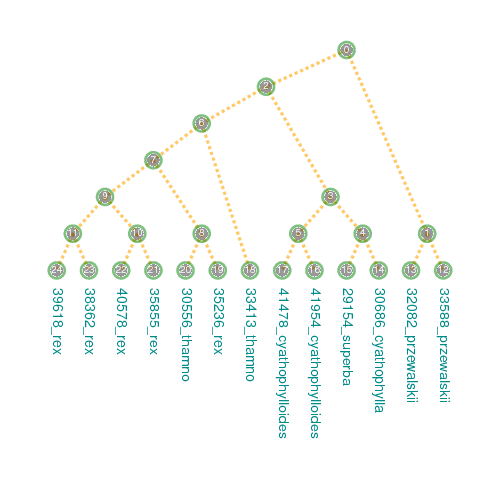

In [62]:
canvas, axes = tre.draw(
    width=500, 
    height=500,
    
    node_labels=True,
    node_labels_style={"font-size": "10px", 
                       "fill": "white"},
    
    node_size=16,
    node_style={"stroke": "green", 
                "stroke-width": 2.5, 
                "fill": "#333333", 
                "opacity": 0.5},  
         
    tip_labels=True,
    tip_labels_style={"font-size": "14px", 
                      "-toyplot-anchor-shift": "18px", 
                      "fill": "darkcyan"},
         
    edge_style={"stroke": "orange", 
                "stroke-opacity": 0.6, 
                "stroke-dasharray": "3,3",
                "stroke-width": 3},
         
    use_edge_lengths=False,
    tree_style="c",
    orient="down",
    );

import toyplot.svg
toyplot.svg.render(canvas, '/home/deren/Documents/toytree/docs/readme_fig2.svg')
canvas

### Embed multiple `toytree` plots inside a  `toyplot` Canvas

In [60]:
import toyplot
import numpy as np

## create a canvas with two subplots
canvas = toyplot.Canvas(width=900, height=400)
axes1 = canvas.cartesian(grid=(1, 3, 0))
axes2 = canvas.cartesian(grid=(1, 3, 1))
axes3 = canvas.cartesian(grid=(1, 3, 2))

## draw a tree into each space by designating the axes
_, axes1 = tre.draw(axes=axes1, orient='right')
_, axes2 = tre.draw(axes=axes2, orient='down', 
                    tip_labels_style={"-toyplot-anchor-shift": "95px"})
_, axes3 = tre.draw(axes=axes3, 
                    tip_labels_style={"-toyplot-anchor-shift": "25px"})

## add more styling to axes
axes1.show = True
axes2.show = False
axes3.show = False

## add additional plots to an axis (use axes.show to see coordinates)
heights = np.random.randint(-5, 0, 13)
axes2.bars(heights, 
           baseline=[-0.5]*13,
           style={"stroke": "#262626"},
           );

heights = np.random.randint(5, 15, 13)
axes3.scatterplot(a=[1]*heights.shape[0], 
                  b=range(heights.shape[0]),
                  size=heights,
                  mstyle={"stroke": "#262626"}
                  );

toyplot.svg.render(canvas, "/home/deren/Documents/toytree/docs/readme_fig3.svg")

## Modify tip labels
The tiplabels can be accessed in the `tiplabels` attribute which will be in the order from top to bottom when the tree is plotting with `orientation='right'`. By default these labels are plotted on the tips of the tree. You can either modify the list in `tree.tiplabels`, or simply create a new list of labels to pass to the `draw` function in the `tip_labels` argument. See http://toyplot.readthedocs.io/en/stable/text.html for the many styling options for text. 

In [52]:
tre.get_tip_labels()

['33588_przewalskii',
 '32082_przewalskii',
 '30686_cyathophylla',
 '29154_superba',
 '41954_cyathophylloides',
 '41478_cyathophylloides',
 '33413_thamno',
 '35236_rex',
 '30556_thamno',
 '35855_rex',
 '40578_rex',
 '38362_rex',
 '39618_rex']

In [53]:
## modify all labels
tiplabels = ["tip-"+tip for tip in tre.get_tip_labels()]

## modify some labels (you can use html tags like <b> for bold)
tiplabels = ["<b>{}</b>".format(tip) if "rex" in tip else tip for tip in tiplabels]

## the 'fill' style will color all tips the same, if you want them to be
## different colors then supply a list with `tip_labels_color`
tipcolors = ["darkcyan" if "prz" not in tip else "orange" for tip in tiplabels]

## draw the tree with tips modified
tre.draw(
    tip_labels=tiplabels,
    tip_labels_color=tipcolors,
    tip_labels_style={"font-size": "12px",
                      "text-anchor":"start", 
                      "-toyplot-anchor-shift":"5px", 
                      "fill": "#292724"}
    );

33588_przewalskii 32082_przewalskii 30686_cyathophylla 29154_superba 41954_cyathophylloides 41478_cyathophylloides 33413_thamno 35236_rex 30556_thamno 35855_rex 40578_rex 38362_rex 39618_rex

## Modify node labels

In [51]:
node_labels=["" for i in tre.node_labels],
         node_size=10,
         node_style={"stroke": "#262626"},

IndentationError: unexpected indent (<ipython-input-51-5867f0226f8b>, line 2)

## Add (bars, scatterplot) to tree plot

In [ ]:
b.scatterplot(a=[3]*13, b=range(13), 
              size=np.random.randint(5, 10, 13), 
              mstyle={"stroke": "#262626"}, 
              );

In [45]:
tre = ipa.tree(newick)
a, b, c = tre.draw(
    node_labels=tre.get_support_values,
    node_labels_style={"font-size": "10px", "-toyplot-anchor-shift": "15px"}, 
    node_size=0,
    tip_labels_style={"font-size": "10px", "-toyplot-anchor-shift": "55px"},    
    );

import numpy as np
b.scatterplot(a=[1]*13, b=range(13), 
              size=np.random.randint(5, 10, 13), 
              mstyle={"stroke": "#262626"}, 
              );
b.scatterplot(a=[2]*13, b=range(13), 
              size=np.random.randint(5, 10, 13), 
              mstyle={"stroke": "#262626"}, 
              );
#b.scatterplot(tre.verts.T)

100.0 100.0 100.0 100.0 100.0 91.0 82.0 73.0 100.0 100.0 33588_przewalskii 32082_przewalskii 30686_cyathophylla 29154_superba 41954_cyathophylloides 41478_cyathophylloides 33413_thamno 35236_rex 30556_thamno 35855_rex 40578_rex 38362_rex 39618_rex 
 
 
 Save as .csv